In [293]:
import pandas as pd
import numpy as np
import os
import pickle

from tqdm import tqdm, tqdm_notebook

In [294]:
fn_table = '../table/table.csv'

In [295]:
df = pd.read_csv(fn_table)
if 'Unnamed: 0' in df:
    del df['Unnamed: 0']

In [296]:
audio_features = list(filter(lambda x:'audio' in x, df.keys()))
print('audio features', len(audio_features))

video_features = list(filter(lambda x:'video' in x, df.keys()))
print('video features', len(video_features))

audio features 512
video features 1000


In [297]:
from sklearn.model_selection import train_test_split
id_list = df['ID'].unique()

Отложим 25% на валидационную выборку

In [298]:
id_train, id_test, _, _ = train_test_split(id_list, id_list, test_size=0.25, random_state=42)
res = {'id_list':id_list,
       'id_train':id_train,
       'id_test':id_test}

pickle.dump(res, open('../table/ids_list', 'wb'))

In [299]:
df_train = df[df['ID'].isin(id_train)].copy()
print('shape', df_train.shape)
df_train.head()

shape (21965, 1515)


,ID,IDu,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,...,video_990,video_991,video_992,video_993,video_994,video_995,video_996,video_997,video_998,video_999
0,Dlh-dzB2U4Y,Dlh-dzB2U4Y0000,2.607634,0.863633,-0.355160,-0.318838,-0.523506,2.409896,0.600519,1.639384,...,0.000012,0.000002,4.627350e-07,1.161320e-06,0.000003,9.342876e-07,4.341770e-07,5.987474e-07,0.000003,0.000669
1,Dlh-dzB2U4Y,Dlh-dzB2U4Y0001,1.307023,0.891650,-0.413467,-0.194147,-0.412424,0.868406,0.633715,1.034080,...,0.000068,0.000036,1.911517e-05,2.784026e-05,0.000113,2.023980e-05,4.324066e-06,1.873863e-05,0.000163,0.000714
2,Dlh-dzB2U4Y,Dlh-dzB2U4Y0002,1.616733,0.729797,-0.064064,1.223061,-0.280416,1.313615,0.613630,1.157565,...,0.000046,0.000029,1.966687e-05,5.420286e-06,0.000065,1.902927e-05,6.942270e-06,1.115194e-05,0.000095,0.001464
3,Dlh-dzB2U4Y,Dlh-dzB2U4Y0003,2.287794,0.184249,-0.289099,0.003288,-0.335130,1.855893,0.065676,1.225654,...,0.000017,0.000025,2.856464e-05,6.722090e-07,0.000013,1.100301e-05,4.328458e-06,1.962101e-06,0.000033,0.000114
4,Dlh-dzB2U4Y,Dlh-dzB2U4Y0004,0.845226,0.299461,-0.367199,0.032141,-0.186181,0.973491,0.918588,0.954014,...,0.000013,0.000026,3.112934e-05,1.406048e-06,0.000013,2.160914e-05,4.782376e-06,1.345697e-06,0.000019,0.000095


In [300]:
df_test = df[df['ID'].isin(id_test)]
print('shape', df_test.shape)
df_test.head()

shape (7626, 1515)


,ID,IDu,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,...,video_990,video_991,video_992,video_993,video_994,video_995,video_996,video_997,video_998,video_999
790,MgHioCC3yCo,MgHioCC3yCo0000,3.465994,5.485182,1.392198,2.075205,0.525350,0.507040,2.051694,-0.095109,...,2.679246e-07,0.000001,9.502548e-08,2.376411e-08,4.663498e-08,7.817474e-07,5.769363e-08,1.840001e-08,7.238343e-07,0.000002
791,MgHioCC3yCo,MgHioCC3yCo0001,2.025639,-0.000835,-0.107687,2.771719,-0.002794,0.302232,1.310762,1.159659,...,6.322124e-04,0.000050,1.256790e-05,2.292095e-05,2.217858e-05,2.510436e-05,1.103054e-05,8.289649e-06,8.420080e-05,0.000894
792,MgHioCC3yCo,MgHioCC3yCo0002,0.641804,-0.073039,0.378311,0.106902,0.236905,0.780073,-0.287821,1.297422,...,1.212915e-03,0.000297,3.188948e-05,9.731972e-05,7.110323e-05,7.188624e-05,3.152313e-05,6.092798e-05,3.050429e-04,0.000547
793,MgHioCC3yCo,MgHioCC3yCo0003,0.981787,-0.122698,0.505672,-0.271406,0.432142,0.388763,0.684052,0.117507,...,3.318185e-06,0.000006,5.788635e-06,5.684009e-06,6.729208e-06,9.437251e-06,7.183262e-06,5.275526e-06,5.798411e-05,0.000027
794,MgHioCC3yCo,MgHioCC3yCo0004,0.878753,0.750289,0.569910,0.186085,0.435217,0.875443,0.170807,0.834477,...,2.306778e-06,0.000006,8.641050e-06,9.580571e-06,6.332739e-06,1.740896e-05,1.181561e-05,1.236563e-06,6.276615e-05,0.000064


In [301]:
%%time
df_train.to_csv('../table/df_train.csv', index = False)
df_test.to_csv( '../table/df_test.csv',  index = False)

CPU times: user 1min 31s, sys: 4.31 s, total: 1min 36s
Wall time: 1min 36s


# Решим задачу двумя способами:
    1) Регрессия - восстановление аудио признаков из видео
       
       Поиск наиболее похожего аудио 
       
    2) Классификация 
           y = 1, если видео с одним id
               для каждого id у нас есть
               pp - видео с одинаковым segm и id
                       *(если n_pp больше максимума сегментов для конкретного Id - 
                               берется максимально возможное значение )
               p  - видео с одинаковым id и разным segm
               
               m  - видео с разными сегментами
          
           y = 0, если видео с разным id
       Прогоняем все со всеми, ищем максимальный p

In [302]:
df['IDu'].nunique() == df.shape[0]

True

In [303]:
n_pp = 100
n_p  = 0
n_m  = 400
N = df_train['ID'].nunique()

print('Размер выборки для обучения определяется так')
print('N = %d'%(N*(n_pp+n_p+n_m)))

Размер выборки для обучения определяется так
N = 95000


    Сначала создадим словарь со следующими значениями
    {'n_pp' : [id1, id2, ]
    
     'n_p'  : [(id1, id2), ...],
     'n_m'  : [(id1, id2), ...],
     
    * id, id1 и id2 это IDu (сокращение ID unique)

In [173]:
# # df_test.sample(10)
# np.random.seed(42)


# lst = [1,2,3,4,5,6]
# np.random.shuffle(lst)
# lst

In [185]:
# tuple(['sdf','gf'])[0]
set([5,1,2,3])


{1, 2, 3, 5}

In [ ]:
# np.random.seed(42)

# def ordered(l1,l2):
#     return tuple([min(l1, l2), max(l1, l2)])

# def _create_pp(lst, n_pp=n_pp):
#     np.random.shuffle(lst)
#     n = min(len(lst), n_pp)
#     return lst[:n]

# def _create_p(lst, n_p=n_p):
#     if n_p>len(lst)*(len(lst)-1):
#         print('Too big n_pp')
#         n_p = len(lst)*(len(lst)-1)
#         #maybe error here
    
#     l1 = np.random.randint(0, len(lst), n_p*10)
#     l2 = np.random.randint(0, len(lst), n_p*10)
    
#     temp = [ordered(lst[i], lst[k]) for i,k in zip(l1, l2) if i!=k]
#     res = []
#     for i in temp:
#         if i[0]==i[1]:
#             print(i)
#             raise ValueError('sosixuy')
#         if not i in res:
#             res.append(i)
#             if len(res)>=n_p:
#                 return res
#     print('Something was wrong')
#     return res

# _all_ids = set(df_train['IDu'].get_values())
# _global_id_was_in_pp = []
# def _create_m(lst, n_m=n_m):
#     global _all_ids
#     not_in_list = list(set(_all_ids)-set(lst))
#     lst_1 = lst.copy()
#     lst_0 = not_in_list.copy()
    
#     np.random.shuffle(lst_1)
#     np.random.shuffle(lst_0)

#     l1 = np.random.randint(0, len(lst_1), size = n_m*10)
#     l0 = np.random.randint(0, len(lst_0), size = n_m*10)

#     temp = [ordered(lst_1[i], lst_0[k]) for i,k in zip(l1, l0)]
#     res = []
#     for i in temp:
#         if i in _global_id_was_in_pp:
#             continue
#         if not i in res:
#             res.append(i)
#             if len(res)>=n_m:
#                 return res

# res = {'pp':[],
#        'p' :[],
#        'm' :[]
#       }

# for ID, obj in tqdm_notebook(df_train[['ID', 'segm', 'IDu']].groupby('ID')):
#     list_pp = _create_pp(obj['IDu'].get_values())
#     list_p  = _create_p(obj['IDu'].get_values())
#     list_m  = _create_m(obj['IDu'].get_values())
#     res['pp'].extend(list_pp)
#     res['p'].extend(list_p)
#     res['m'].extend(list_m)
    

In [309]:
def create_dataset(df, n_pp = n_pp, n_p = n_p, n_m = n_m):
    np.random.seed(42)

    def ordered(l1,l2):
        return tuple([min(l1, l2), max(l1, l2)])

    def _create_pp(lst, n_pp=n_pp):
        np.random.shuffle(lst)
        n = min(len(lst), n_pp)
        return lst[:n]

    def _create_p(lst, n_p=n_p):
        if n_p>len(lst)*(len(lst)-1):
            print('Too big n_pp')
            n_p = len(lst)*(len(lst)-1)
            #maybe error here

        l1 = np.random.randint(0, len(lst), n_p*10)
        l2 = np.random.randint(0, len(lst), n_p*10)

        temp = [ordered(lst[i], lst[k]) for i,k in zip(l1, l2) if i!=k]
        res = []
        for i in temp:
            if i[0]==i[1]:
                print(i)
                raise ValueError('sosixuy')
            if not i in res:
                res.append(i)
                if len(res)>=n_p:
                    return res
        print('Something was wrong')
        print(len(res))
        return res

    _all_ids = set(df_train['IDu'].get_values())
    _global_id_was_in_pp = []
    def _create_m(lst, n_m=n_m):
        global _all_ids
        not_in_list = list(set(_all_ids)-set(lst))
        lst_1 = lst.copy()
        lst_0 = not_in_list.copy()

        np.random.shuffle(lst_1)
        np.random.shuffle(lst_0)

        l1 = np.random.randint(0, len(lst_1), size = n_m*10)
        l0 = np.random.randint(0, len(lst_0), size = n_m*10)

        temp = [ordered(lst_1[i], lst_0[k]) for i,k in zip(l1, l0)]
        res = []
        for i in temp:
            if i in _global_id_was_in_pp:
                continue
            if not i in res:
                res.append(i)
                if len(res)>=n_m:
                    return res

    res = {'pp':[],
           'p' :[],
           'm' :[]
          }

    for ID, obj in tqdm_notebook(df[['ID', 'segm', 'IDu']].groupby('ID')):
        list_pp = _create_pp(obj['IDu'].get_values())
        list_p  = _create_p(obj['IDu'].get_values())
        list_m  = _create_m(obj['IDu'].get_values())
        res['pp'].extend(list_pp)
        res['p'].extend(list_p)
        res['m'].extend(list_m)
    #Checking correctness
    if len(set(res['pp'])&set(res['p']))!=0 or\
        len(set(res['pp'])&set(res['m']))!=0 or\
        len(set(res['p'])&set(res['m']))!=0:
        raise ValueError('Something wrong')

    print('pp\tp\tm')
    print(len(res['pp']), len(res['p']), len(res['m']))
    print(len(res['pp'])+len(res['p'])+len(res['m']))
    print('==='*2)
    print('devide by (n_p, n_pp, n_m)*df_train.shape[0]')
    print('pp\tp\tm')
    df.index = df['IDu']
#     print(len(res['pp'])/n_pp/df_train['ID'].nunique(), 
#           len(res['p'])/(n_p if np!=0 else 1)/df_train['ID'].nunique(), 
#           len(res['m'])/n_m/df_train['ID'].nunique())

    ind1 = [i for i in res['pp']]
    ind2 = [i for i in res['pp']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_pp = pd.concat([a,b], axis = 1)
    df_pp['y'] = 2

    ind1 = [i[0] for i in res['p']]
    ind2 = [i[1] for i in res['p']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_p = pd.concat([a,b], axis = 1)
    df_p['y'] = 1

    ind1 = [i[0] for i in res['m']]
    ind2 = [i[1] for i in res['m']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_m = pd.concat([a,b], axis = 1)
    df_m['y'] = 0
    df_train_final = pd.concat([df_p, df_pp, df_m])
    print('shape : ',df_train_final.shape)
    return df_train_final

df_results = create_dataset(df_train)

Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something was wrong
0
Something 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



AssertionError: Number of manager items must equal union of block items
# manager items: 1517, # tot_items: 1518

In [ ]:
#Checking correctness
if len(set(res['pp'])&set(res['p']))!=0 or\
    len(set(res['pp'])&set(res['m']))!=0 or\
    len(set(res['p'])&set(res['m']))!=0:
    raise ValueError('Something wrong')
    
print('pp\tp\tm')
print(len(res['pp']), len(res['p']), len(res['m']))
print(len(res['pp'])+len(res['p'])+len(res['m']))
print('==='*2)
print('devide by (n_p, n_pp, n_m)*df_train.shape[0]')
print('pp\tp\tm')
print(len(res['pp'])/n_pp/df_train['ID'].nunique(), 
      len(res['p'])/n_p/df_train['ID'].nunique(), 
      len(res['m'])/n_m/df_train['ID'].nunique())

In [ ]:
df_train.index = df_train['IDu']
np.mean(df_train.index==df_train['IDu'])

In [179]:
# ID = res['pp'][0]
# dict(df_train.loc[ID, audio_features])

In [100]:
pickle.dump(res, open('res.pickle', 'wb'))

In [ ]:
# %%time
# ind1 = [i for i in res['pp']]
# ind2 = [i for i in res['pp']]
# a = df_train.loc[ind1, audio_features]
# a['idu1'] = a.index
# a = a.reset_index()
# b = df_train.loc[ind2, video_features]
# b['idu2'] = b.index
# b = b.reset_index()

# df_pp = pd.concat([a,b], axis = 1)
# df_pp['y'] = 2

# ind1 = [i[0] for i in res['p']]
# ind2 = [i[1] for i in res['p']]
# a = df_train.loc[ind1, audio_features]
# a['idu1'] = a.index
# a = a.reset_index()
# b = df_train.loc[ind2, video_features]
# b['idu2'] = b.index
# b = b.reset_index()

# df_p = pd.concat([a,b], axis = 1)
# df_p['y'] = 1

# ind1 = [i[0] for i in res['m']]
# ind2 = [i[1] for i in res['m']]
# a = df_train.loc[ind1, audio_features]
# a['idu1'] = a.index
# a = a.reset_index()
# b = df_train.loc[ind2, video_features]
# b['idu2'] = b.index
# b = b.reset_index()

# df_m = pd.concat([a,b], axis = 1)
# df_m['y'] = 0


In [ ]:
# df_pp.shape[0]+df_p.shape[0]+df_m.shape[0]

In [ ]:
# df_train_final = pd.concat([df_p, df_pp, df_m])
# print('shape : ',df_train_final.shape)
# df_train_final.head()

In [ ]:
%%time
df_train_final.to_csv('../table/train_object.csv')

In [ ]:
df_train_final['y_id'] = df_train_final['y']>=1

In [ ]:
df_train_final['y_id'].value_counts()

In [ ]:
df_train_final.sample(frac=1)

In [ ]:
features = video_features+audio_features
print(len(features))

In [ ]:
X = df_train_final[features].get_values()
y = df_train_final['y_id'].get_values()

In [ ]:
print(X.shape, y.shape)

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)


input_shape = len(features)
output_shape = 1

model = Sequential()
model.add(Dense(512, input_dim=input_shape, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(output_shape, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [292]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               774656    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 943,041
Trainable params: 943,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import keras

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 1} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [ ]:
model.fit(X, y, batch_size=16, epochs=30)

In [262]:
model.save('final_model.h5')

In [271]:
df_train[:2].head()

,ID,IDu,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,...,video_990,video_991,video_992,video_993,video_994,video_995,video_996,video_997,video_998,video_999
IDu,,,,,,,,,,,,,,,,,,,,,
Dlh-dzB2U4Y0000,Dlh-dzB2U4Y,Dlh-dzB2U4Y0000,2.607634,0.863633,-0.355160,-0.318838,-0.523506,2.409896,0.600519,1.639384,...,0.000012,0.000002,4.627350e-07,0.000001,0.000003,9.342876e-07,4.341770e-07,5.987474e-07,0.000003,0.000669
Dlh-dzB2U4Y0001,Dlh-dzB2U4Y,Dlh-dzB2U4Y0001,1.307023,0.891650,-0.413467,-0.194147,-0.412424,0.868406,0.633715,1.034080,...,0.000068,0.000036,1.911517e-05,0.000028,0.000113,2.023980e-05,4.324066e-06,1.873863e-05,0.000163,0.000714


In [269]:
model.predict(df_train[features][:2])

array([[0.46940705],
       [0.27229595]], dtype=float32)

In [261]:
from keras.models import load_model

In [266]:
from tqdm import tqdm_notebook
def get_predictions(model, X, batch_size = 1024):
    y_predict = []
    for ind in tqdm_notebook(range(int(X.shape[0]/batch_size)+1)):
        #print(model.predict_proba(X[ind*batch_size : (ind+1)*batch_size]))
        y_predict.extend(model.predict_proba(X[ind*batch_size : 
                                               min((ind+1)*batch_size, X.shape[0])]
                                            )[:,0]
                        )
    return y_predict

y_predict = get_predictions(model, df_train_final[features].get_values(), batch_size=1024)

In [267]:
df_train_final['p_id'] = y_predict

In [289]:
# for res in df['']
def get_all_classification_metrics(y_truth, prob):
    from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score,\
                                accuracy_score, precision_score, recall_score,\
                                average_precision_score, roc_auc_score

    y = y_truth
    p = [i>0.5 for i in prob]
    t = prob
    print('classification_report')
    print(classification_report(y, p))
    print('\nconfusion_matrix')
    print(confusion_matrix(y, p)*1.0/len(y))
    print('\ncohen_kappa_score       %2.4f'%cohen_kappa_score(y, p))
    print('\naccuracy_score          %2.4f'%accuracy_score(y, p))
    print('\nprecision_score         %2.4f'%precision_score(y, p))
    print('\nrecall_score            %2.4f'%recall_score(y, p))
    print('\nroc-auc score           %2.4f'%roc_auc_score(y, p))
    print('\nprecision-recall score %2.4f'%average_precision_score(y, t))
    

y = df_train_final['y_id'].get_values()
p = df_train_final.get_values()
get_all_classification_metrics(y, p)

TypeError: unorderable types: str() > float()

In [284]:
def create_dataset(df, n_pp, n_p, n_m):
    audio_features = list(filter(lambda x:'audio' in x, df.keys()))
    print('audio features', len(audio_features))

    video_features = list(filter(lambda x:'video' in x, df.keys()))
    print('video features', len(video_features))
    
    df = df.copy()
    np.random.seed(42)

    def ordered(l1,l2):
        return tuple([min(l1, l2), max(l1, l2)])

    def _create_pp(lst, n_pp=n_pp):
        np.random.shuffle(lst)
        n = min(len(lst), n_pp)
        return lst[:n]

    def _create_p(lst, n_p=n_p):
        if n_p>len(lst)*(len(lst)-1):
            print('Too big n_pp')
            n_p = len(lst)*(len(lst)-1)
            #maybe error here

        l1 = np.random.randint(0, len(lst), n_p*10)
        l2 = np.random.randint(0, len(lst), n_p*10)

        temp = [ordered(lst[i], lst[k]) for i,k in zip(l1, l2) if i!=k]
        res = []
        for i in temp:
            if i[0]==i[1]:
                print(i)
                raise ValueError('sosixuy')
            if not i in res:
                res.append(i)
                if len(res)>=n_p:
                    return res
        print('Something was wrong')
        return res

    _all_ids = set(df['IDu'].get_values())
    _global_id_was_in_pp = []
    def _create_m(lst, n_m=n_m):
        #global _all_ids
        not_in_list = list(set(_all_ids)-set(lst))
        lst_1 = lst.copy()
        lst_0 = not_in_list.copy()

        np.random.shuffle(lst_1)
        np.random.shuffle(lst_0)

        l1 = np.random.randint(0, len(lst_1), size = n_m*10)
        l0 = np.random.randint(0, len(lst_0), size = n_m*10)

        temp = [ordered(lst_1[i], lst_0[k]) for i,k in zip(l1, l0)]
        res = []
        for i in temp:
            if i in _global_id_was_in_pp:
                continue
            if not i in res:
                res.append(i)
                if len(res)>=n_m:
                    return res

    res = {'pp':[],
           'p' :[],
           'm' :[]
          }

    for ID, obj in tqdm_notebook(df[['ID', 'segm', 'IDu']].groupby('ID')):
        list_pp = _create_pp(obj['IDu'].get_values())
        list_p  = _create_p(obj['IDu'].get_values())
        list_m  = _create_m(obj['IDu'].get_values())
        res['pp'].extend(list_pp)
        res['p'].extend(list_p)
        res['m'].extend(list_m)
    #Checking correctness
    if len(set(res['pp'])&set(res['p']))!=0 or\
        len(set(res['pp'])&set(res['m']))!=0 or\
        len(set(res['p'])&set(res['m']))!=0:
        raise ValueError('Something wrong')

    print('pp\tp\tm')
    print(len(res['pp']), len(res['p']), len(res['m']))
    print(len(res['pp'])+len(res['p'])+len(res['m']))
    print('==='*2)
    print('devide by (n_p, n_pp, n_m)*df_train.shape[0]')
    print('pp\tp\tm')
    print(len(res['pp'])/n_pp/df['ID'].nunique(), 
          len(res['p'])/n_p/df['ID'].nunique(), 
          len(res['m'])/n_m/df['ID'].nunique())
    df.index = df['IDu']
    ind1 = [i for i in res['pp']]
    ind2 = [i for i in res['pp']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_pp = pd.concat([a,b], axis = 1)
    df_pp['y'] = 2

    ind1 = [i[0] for i in res['p']]
    ind2 = [i[1] for i in res['p']]
    
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_p = pd.concat([a,b], axis = 1)
    df_p['y'] = 1

    ind1 = [i[0] for i in res['m']]
    ind2 = [i[1] for i in res['m']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_m = pd.concat([a,b], axis = 1)
    df_m['y'] = 0
    df_train_final = pd.concat([df_p, df_pp, df_m])
    print('shape : ',df_train_final.shape)
    return df_train_final

n_pp = 100
n_p  = 300
n_m  = 400
df_results = create_dataset(df_test.copy(), n_pp = n_pp, n_p = n_p, n_m = n_m)

audio features 512
video features 1000


pp	p	m
6247 19200 25600
51047
devide by (n_p, n_pp, n_m)*df_train.shape[0]
pp	p	m
0.97609375 1.0 1.0
shape :  (51047, 1517)


In [285]:
y_predict = get_predictions(model, df_results[features].get_values())

In [287]:
df_results['y_id'] = df_results['y']>=1
df_results['p_id'] = y_predict
y = df_results['y_id'].get_values()
p = df_results['p_id'].get_values()
get_all_classification_metrics(y, p)

classification_report
              precision    recall  f1-score   support

       False       0.50      0.82      0.62     25600
        True       0.51      0.19      0.27     25447

   micro avg       0.51      0.51      0.51     51047
   macro avg       0.51      0.50      0.45     51047
weighted avg       0.51      0.51      0.45     51047


confusion_matrix
[[0.41134641 0.09015221]
 [0.40482301 0.09367837]]

cohen_kappa_score       0.0082

accuracy_score          0.5050

precision_score         0.5096

recall_score            0.1879

roc-auc score           0.5041

precision-recall score 0.5085


##### results
n_pp = 100
n_p  = 300
n_m  = 9000


    classification_report
                  precision    recall  f1-score   support

           False       0.96      0.81      0.88    576000
            True       0.04      0.19      0.07     25447

       micro avg       0.79      0.79      0.79    601447
       macro avg       0.50      0.50      0.48    601447
    weighted avg       0.92      0.79      0.85    601447


    confusion_matrix
    [[0.78016351 0.17752686]
     [0.03427235 0.00803728]]

    cohen_kappa_score       0.0018

    accuracy_score          0.7882

    precision_score         0.0433

    recall_score            0.1900

    roc-auc score           0.5023

    precision-recall score 0.0438

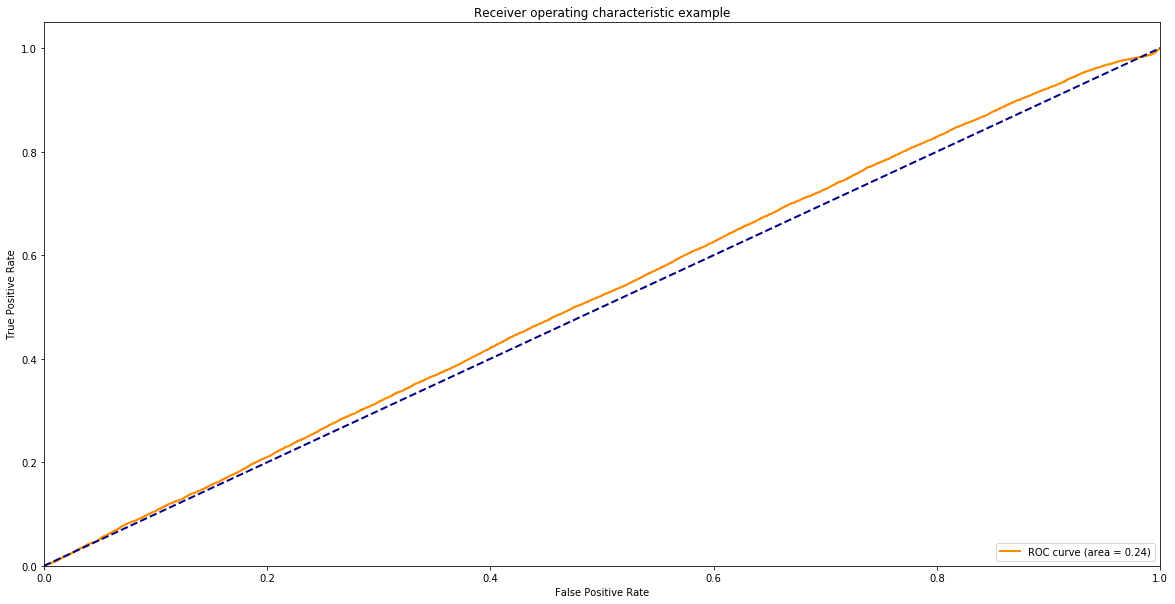

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y, p = df_results['y_id'].get_values(), df_results['p_id'].get_values()
fpr, tpr, t_list = roc_curve(y, p)

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
plt.figure(figsize = (20, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(y, p))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [278]:
np.mean(y_predict)

0.35752735

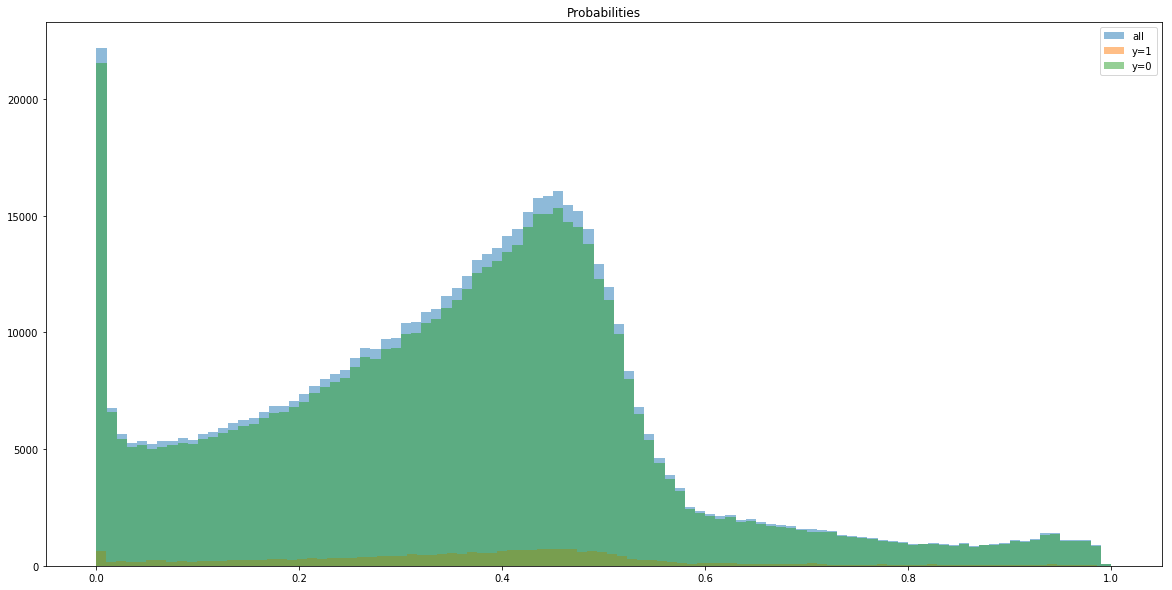

In [279]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('Probabilities')
plt.hist(df_results['p_id'], bins = 100, alpha = 0.5, label = 'all')
plt.hist(df_results[df_results['y_id']==1]['p_id'], bins = 100, alpha = 0.5, label = 'y=1')
plt.hist(df_results[df_results['y_id']==0]['p_id'], bins = 100, alpha = 0.5, label = 'y=0')

plt.legend()
plt.show()

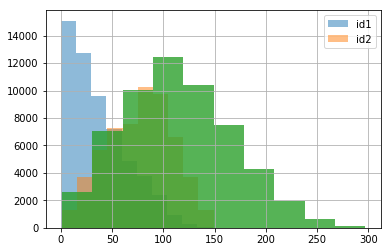

In [222]:
from matplotlib import pyplot as plt
%matplotlib inline
df_train_final[df_train_final['y']==1]['idu1'].apply(lambda x:int(x[-4:])).hist(alpha = 0.5, label = 'id1')
df_train_final[df_train_final['y']==1]['idu2'].apply(lambda x:int(x[-4:])).hist(alpha = 0.5, label = 'id2')

(df_train_final[df_train_final['y']==1]['idu1'].apply(lambda x:int(x[-4:]))+\
df_train_final[df_train_final['y']==1]['idu2'].apply(lambda x:int(x[-4:]))).hist(alpha = 0.8)
plt.legend()
plt.show()


In [223]:
# df_new = []
# for id1, id2 in tqdm_notebook(res['p']):
#     res1 = dict(df_train.loc[id1, audio_features])
#     res1['id1'] = id1
    
#     res2 = dict(df_train.loc[id2, video_features])
#     res2['id2']  = id2 
    
#     if len(set(res1.keys()) & set(res2.keys()))!=0:
#         raise ValueError
#     else:
#         res1.update(res2)
#     df_new.append(res1)
    

In [224]:
# id_1 = [res['m']]

In [225]:
# set([1])!=set()

In [226]:
# len(res['m'])/n_m/df_train['ID'].nunique()

In [227]:
# df_train